# Esercizi di programmazione

## Esercizio 1: Anagrammi
Vogliamo realizzare una macchina che generi anagrammi a partire da parole reali. Il gioco consiste nel ricostruire la parola corretta a partire dalle lettere ricombinate fra loro.

Concepire sia la macchina per la creazione dell'anagramma casuale da risolvere, sia la macchina che gioca, cercando di indovinare il testo originale.

### Ingredienti
- ???

### Procedura
- ???

**Risorse utili**
Possiamo utilizzare una lista di parole estratte da un testo.

In [17]:
import json
import numpy as np
import random 

In [2]:
jfile = "./data/parole_manzoni.json"
with open(jfile, 'r') as infile:
    data = json.load(infile)
words = data['words']
print(words[:10])

['ramo', 'lago', 'esce', 'giace', 'catene', 'interrotte', 'monti', 'settentrione', 'mezzogiorno', 'dopo']


In [27]:
class Controller:
    def __init__(self, words):
        self.words = words 
        self.minlen, self.maxlen = self.check_len()

    def check_len(self):
        minlen = None
        maxlen = None
        for word in self.words:
            if minlen is None:
                minlen = len(word)
            if maxlen is None:
                maxlen = len(word)
            if len(word) < minlen:
                minlen = len(word)
            if len(word) > maxlen:
                maxlen = len(word)
        return minlen, maxlen

    def select_word(self, num_chars):
        if self.minlen <= num_chars <= self.maxlen:
            selected_words = []
            for word in self.words:
                if len(word) == num_chars:
                    selected_words.append(word)
            w = np.random.choice(selected_words)
            return w
        else:
            return np.random.choice(self.words)

    def split_word(self, word):
        return list(word)

    def shuffle(self, list_chars):
        random.shuffle(list_chars)
        return list_chars

class DummyPlayer:
    def __init__(self, chars, words):
        self.chars = chars
        self.words = words
    def play(self):
        ch = [x for x in self.chars]
        random.shuffle(ch)
        return "".join(ch)

In [37]:
c = Controller(words=words)
trials = []
for match in range(100):
    w = c.select_word(num_chars=6)
    l = c.split_word(w)
    s = c.shuffle(l)
    dummy = DummyPlayer(chars=s, words=c.words)
    counter = 0
    for i in range(5000):
        counter += 1
        guess = dummy.play()
        if guess == w:
            break
    trials.append(counter)

In [38]:
t = np.array(trials)
print(f"Media: {t.mean()}")
print(f"Std: {t.std()}")



Media: 453.64
Std: 558.6633605311879


In [39]:
import matplotlib.pyplot as plt

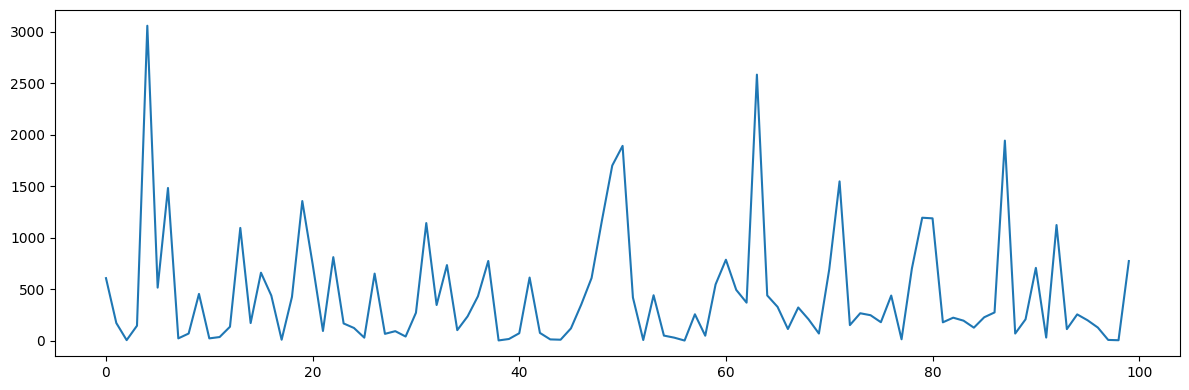

In [40]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(t)
plt.tight_layout()
plt.show()